### MLP 구현
- Data set : MNIST
    - tensorflow input_data 가 deprecated 되어 keras 의 data set 으로 가져옴
- Split Train set and Validation set for checking overfit 
- Normalize image data (0-255) to (0-1) 
    - x / 255 
- One-hot encoding 
    - keras 
    - pandas : get_dummies
    - scikit-learn 
- Model 
    - Hypothesis : softmax 
    - Cost : Cross-entropy 
    - Optimizer = Adam optimizer 

In [2]:
import tensorflow as tf

In [ ]:
# deprecated 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist.train.num_examples # 60000
mnist.test.num_examples # 10000

### Data Load using Keras

In [14]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [48]:
print('train set: {0}, test set:{1}'.format(len(x_train), len(x_test)))

train set: 60000, test set:10000


In [40]:
print('[Shape] X: {0}, Y: {1}'.format(x_train.shape, y_train.shape))

[Shape] X: (60000, 28, 28), Y: (60000,)


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

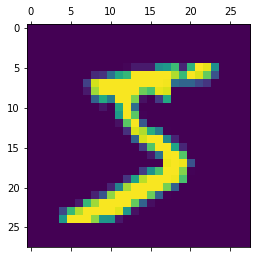

In [15]:
plt.matshow(x_train[0])

### Split train data and validation data
- validation data
    * train data 로 학습된 모델의 성능을 평가하기 위해서 사용 
    * 규제 기법 중 하나인 조기멈춤에 활용할 수 있다. (overcome overfitting )
- 6만개의 train set 에서 1만개의 validation set 

In [49]:
# split train data , validation data among x_train
x_val = x_train[50000:60000]
x_train = x_train[0:50000]
y_val = y_train[50000:60000]
y_train = y_train[0:50000]

In [42]:
# 확인!
print('train size: {0}, validation size: {1}'.format(len(x_train), len(x_val)))

train size: 50000, validation size: 10000


In [43]:
x_val.shape

(10000, 28, 28)

### Reshape  
- Reshape matrix to array for using input data
-  28 * 28 (matrix) --> 784 (series)

In [52]:
x_train = x_train.reshape(50000, 784) 
x_val = x_val.reshape(10000, 784)
x_test = x_test.reshape(10000, 784)

In [53]:
print('[Shape] x_train shape : {0}, x_test shape :{1}'.format(x_train.shape, x_test.shape))

[Shape] x_train shape : (50000, 784), x_test shape :(10000, 784)


In [54]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Normalize data
- 0 - 255 : 흰색 부터 검은색까지 scale 값
- x / 255 --> 0 ~ 1 : variance를 줄여줌으로써 학습속도도 빨라지고 accuracy 도 올라가는 경향 

In [55]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_val /= gray_scale
x_test /= gray_scale

### Label to one hot Encoding value
- method
    - keras
    - scikit-learn
    - pandas

In [56]:
# keras one-hot encoding 
num_class = 10
keras_y_train = tf.keras.utils.to_categorical(y_train, num_class)
keras_y_val = tf.keras.utils.to_categorical(y_val, num_class)
keras_y_test = tf.keras.utils.to_categorical(y_test, num_class)

In [67]:
print('[Shape] \n one-hot 전 shpae: {0} \n {1},\n one-hot 후 shape : {2} \n {3}'
      .format(y_train.shape, y_train[0], keras_y_train.shape ,keras_y_train[0]))

[Shape] 
 one-hot 전 shpae: (50000,) 
 5,
 one-hot 후 shape : (50000, 10) 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [68]:
import pandas as pd

In [69]:
# pandas one-hot encoding
pan_y_train = pd.get_dummies(y_train)
pan_y_val = pd.get_dummies(y_val)
pan_y_test = pd.get_dummies(y_test)

In [91]:
print('[Shape] \n one-hot 전 shpae: {0} \n {1},\n one-hot 후 shape : {2} \n {3}'
      .format(y_train.shape, y_train[0], pan_y_train.shape ,pan_y_train.iloc[0]))

[Shape] 
 one-hot 전 shpae: (50000,) 
 5,
 one-hot 후 shape : (50000, 10) 
 0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: 0, dtype: uint8


In [74]:
from sklearn.preprocessing import OneHotEncoder

In [92]:
# reshape for using scikit-learn OneHotEncoder 
rsp_y_train = y_train.reshape(-1, 1)
rsp_y_train.shape

(50000, 1)

In [75]:
# scikit-learn one-hot encoding
ohe = OneHotEncoder()
skl_y_train = ohe.fit_transform(rsp_y_train).toarray()

In [89]:
print('[Shape] \n one-hot 전 shpae: {0} \n {1},\n one-hot 후 shape : {2} \n {3}'
      .format(y_train.shape, y_train[0], skl_y_train.shape ,skl_y_train[0]))

[Shape] 
 one-hot 전 shpae: (50000,) 
 5,
 one-hot 후 shape : (50000, 10) 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Tensorflow MLP Graph

In [93]:
num_class = 10
X = tf.placeholder(tf.float32, [None, 784]) # 28 * 28 
Y = tf.placeholder(tf.float32, [None, num_class]) # 10개 

In [94]:
def mlp(x):
    # hidden layer 1
    W1 = tf.Variable(tf.random_uniform([784, 256]))
    b1 = tf.Variable(tf.zeros([256]))
    h1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    
    # hidden layer 2
    W2 = tf.Variable(tf.random_uniform([256, 128]))
    b2 = tf.Variable(tf.zeros([128]))
    h2 = tf.nn.relu(tf.matmul(h1, W2) + b2)
    
    # output layer 
    W3 = tf.Variable(tf.random_uniform([128 ,10]))
    b3 = tf.Variable(tf.zeros([10]))
    logits = tf.matmul(h2, W3) + b3
    
    return logits

In [98]:
# hypothesis = logits 
logits = mlp(X) 

In [109]:
# prediction 함수인 softmax 와 실제 y 의 오차 
cost_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

In [110]:
# cost 를 줄이는 방향으로 계속 학습 
train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost_op)

### Run graph 

In [101]:
# train hyperparameter 
epoch_cnt = 20 # 전체 데이터 20번 학습 
batch_size = 1000
# 50000 // 1000 = 50 : 전체 데이터를 50개로 나눠서 실행 
iteration = len(x_train) // batch_size

In [111]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epoch_cnt):
        avg_loss = 0
        start =0
        end = batch_size # 1000
        
        for i in range(iteration):
            _, cost = sess.run([train_op, cost_op],
                                  feed_dict = {X:x_train[start:end], Y:keras_y_train[start:end]})
            start += batch_size
            end += batch_size
            avg_loss += cost / iteration
            
        # validate model
        h = tf.nn.softmax(logits)
        is_correct = tf.equal(tf.argmax(h, axis=1), tf.argmax(Y, axis=1))
        # calculate acc 
        accuracy = tf.reduce_mean(tf.cast(is_correct, "float"))
        cur_val_acc = accuracy.eval({X:x_val, Y:keras_y_val})
        print("Epoch >> {0} \n Validation ACC: {1} \n cost: {2}".format(
                epoch, cur_val_acc, avg_loss))
    
    # Test model
    h = tf.nn.softmax(logits)
    is_correct = tf.equal(tf.argmax(h, axis=1), tf.argmax(Y, axis=1))
    # calculate acc 
    accuracy = tf.reduce_mean(tf.cast(is_correct, "float"))
    print('[Test Accuracy] {0}'.format(accuracy.eval({X:x_test, Y:keras_y_test})))


Epoch >> 0 
 Validation ACC: 0.1826000064611435 
 cost: 7889.600847778325
Epoch >> 1 
 Validation ACC: 0.7907000184059143 
 cost: 258.28172824859627
Epoch >> 2 
 Validation ACC: 0.8787000179290771 
 cost: 17.215058269500734
Epoch >> 3 
 Validation ACC: 0.8853999972343445 
 cost: 10.820834321975708
Epoch >> 4 
 Validation ACC: 0.8840000033378601 
 cost: 9.070477018356325
Epoch >> 5 
 Validation ACC: 0.8842999935150146 
 cost: 8.17855834007263
Epoch >> 6 
 Validation ACC: 0.8942999839782715 
 cost: 7.054223055839537
Epoch >> 7 
 Validation ACC: 0.878600001335144 
 cost: 8.653544282913206
Epoch >> 8 
 Validation ACC: 0.9049999713897705 
 cost: 7.352967267036438
Epoch >> 9 
 Validation ACC: 0.9157000184059143 
 cost: 7.151118326187133
Epoch >> 10 
 Validation ACC: 0.8964999914169312 
 cost: 5.814308238029481
Epoch >> 11 
 Validation ACC: 0.8906999826431274 
 cost: 4.982299079895021
Epoch >> 12 
 Validation ACC: 0.8235999941825867 
 cost: 46.01525740146636
Epoch >> 13 
 Validation ACC: 0.91

In [113]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epoch_cnt):
        avg_loss = 0
        start =0
        end = batch_size # 1000
        
        for i in range(iteration):
            _, cost = sess.run([train_op, cost_op],
                                  feed_dict = {X:x_train[start:end], Y:keras_y_train[start:end]})
            start += batch_size
            end += batch_size
            avg_loss = cost
            
        # validate model
        h = tf.nn.softmax(logits)
        is_correct = tf.equal(tf.argmax(h, axis=1), tf.argmax(Y, axis=1))
        # calculate acc 
        accuracy = tf.reduce_mean(tf.cast(is_correct, "float"))
        cur_val_acc = accuracy.eval({X:x_val, Y:keras_y_val})
        print("Epoch >> {0} \n Validation ACC: {1} \n cost: {2}".format(
                epoch, cur_val_acc, avg_loss))
    
    # Test 
    h = tf.nn.softmax(logits)
    is_correct = tf.equal(tf.argmax(h, axis=1), tf.argmax(Y, axis=1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, "float"))
    print('[Test Accuracy] {0}'.format(accuracy.eval({X:x_test, Y:keras_y_test})))


Epoch >> 0 
 Validation ACC: 0.22269999980926514 
 cost: 1182.500732421875
Epoch >> 1 
 Validation ACC: 0.742900013923645 
 cost: 29.421234130859375
Epoch >> 2 
 Validation ACC: 0.8751999735832214 
 cost: 11.128425598144531
Epoch >> 3 
 Validation ACC: 0.8873000144958496 
 cost: 8.047269821166992
Epoch >> 4 
 Validation ACC: 0.8952000141143799 
 cost: 6.3472771644592285
Epoch >> 5 
 Validation ACC: 0.9010000228881836 
 cost: 4.90213680267334
Epoch >> 6 
 Validation ACC: 0.9064000248908997 
 cost: 3.9920904636383057
Epoch >> 7 
 Validation ACC: 0.9079999923706055 
 cost: 3.459986686706543
Epoch >> 8 
 Validation ACC: 0.9067999720573425 
 cost: 3.153001546859741
Epoch >> 9 
 Validation ACC: 0.8999000191688538 
 cost: 3.1492342948913574
Epoch >> 10 
 Validation ACC: 0.8991000056266785 
 cost: 2.8083465099334717
Epoch >> 11 
 Validation ACC: 0.9096999764442444 
 cost: 2.5200512409210205
Epoch >> 12 
 Validation ACC: 0.9053999781608582 
 cost: 2.662661552429199
Epoch >> 13 
 Validation ACC: